# Beyond All Reason
## Beyond All Information

https://www.beyondallreason.info/

In [2]:
from enum import auto, StrEnum

from urllib.parse import quote
from urllib.request import urlopen
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rcParams["figure.figsize"] = (10, 10)


class Preset(StrEnum):
    duel = auto()
    team = auto()
    ffa = auto()
    all = auto()

PRESET = Preset.team

In [3]:
def get_data(url: str):
    with urlopen(url) as response:
        source = response.read().decode("utf-8")
    data = json.loads(source)
    return data

In [4]:
leaderboards = get_data("https://api.bar-rts.com/leaderboards")

In [5]:
team_leaderboards_df = pd.json_normalize(leaderboards[PRESET.name])

In [6]:
team_leaderboards_df

age   colour                      icon              name     rating
0     0  #660000             fa-solid fa-c       [TZN]Clyret  55.406900
1     0  #666666          fa-solid fa-user        [KoN]VodKa  48.127143
2     0  #00aa66   fa-solid fa-code-commit            Raghna  46.830432
3     0  #666666          fa-solid fa-user        MomsBoyToy  46.389925
4     4  #666666          fa-solid fa-user       XFactorLive  43.679861
5     0  #660000             fa-solid fa-c          [Fx]ShoX  43.664331
6     1  #660000             fa-solid fa-c           Dankest  43.495262
7     2  #660000             fa-solid fa-c        Zerpiederp  43.164498
8     1  #666666          fa-solid fa-user             goopy  42.105083
9     0  #660066    fa-solid fa-user-robot        HellsHound  41.423968
10    0  #666666          fa-solid fa-user              [8D]  41.214417
11    0  #666666          fa-solid fa-user          SadPanda  40.545022
12    0  #666666          fa-solid fa-user          Dave[tB]  39.952302
13    0  #AA6600     fa-solid fa-drumstick         PathOfBFR  39.838625
14    0  #666666          fa-solid fa-user            Malady  39.359179
15    0  #666666          fa-solid fa-user         BIG_DOLFY  38.932022
16    0  #666666          fa-solid fa-user            Raikoh  37.651122
17    0  #666666          fa-solid fa-user             Flash  37.636364
18    0  #666666          fa-solid fa-user            Snoopa  36.934951
19    0  #666666          fa-solid fa-user  Skymirrh[BAB]Lob  36.541043
20    0  #666666          fa-solid fa-user    Fatalebaguette  36.499289
21    0  #666666          fa-solid fa-user       Lostdeadman  36.463622
22    0  #666666          fa-solid fa-user        Shadhunter  36.109255
23    0  #666666          fa-solid fa-user            Daymus  35.852771
24    9  #000066             fa-solid fa-a             MAdka  35.220746
25    5  #666666          fa-solid fa-user     [CMG]Operator  34.930492
26    1  #666666          fa-solid fa-user      starcraftman  34.442443
27    0  #666666          fa-solid fa-user       [LOB]Choice  34.260331
28    0  #000066             fa-solid fa-a       MightySheep  34.075528
29    0  #000066             fa-solid fa-a              Emre  34.030781

In [7]:
name_list = get_data("https://api.bar-rts.com/cached-users")

In [8]:
name_list

[{'id': 6955, 'username': 'FBN007', 'countryCode': 'DK'},
 {'id': 6954, 'username': 'robdog3050', 'countryCode': 'US'},
 {'id': 45644, 'username': 'WildW0lf', 'countryCode': 'AU'},
 {'id': 6733, 'username': 'Japoxferd', 'countryCode': 'US'},
 {'id': 4028, 'username': 'Aviation', 'countryCode': 'US'},
 {'id': 2118, 'username': 'Newrom', 'countryCode': 'FR'},
 {'id': 6630, 'username': 'gto84', 'countryCode': 'FR'},
 {'id': 6732, 'username': 'KVAZDOPIL', 'countryCode': 'RU'},
 {'id': 6875, 'username': 'fastback', 'countryCode': 'AU'},
 {'id': 6925, 'username': 'abuk55', 'countryCode': 'PL'},
 {'id': 6831, 'username': 'Piotrekblue', 'countryCode': 'PL'},
 {'id': 4577, 'username': '_Megalomania_', 'countryCode': 'US'},
 {'id': 5598, 'username': 'Drakodjin', 'countryCode': 'FR'},
 {'id': 6957, 'username': 'Patasc', 'countryCode': 'FR'},
 {'id': 6465, 'username': 'lburton', 'countryCode': 'US'},
 {'id': 6932, 'username': 'Mikael912', 'countryCode': 'SE'},
 {'id': 5352, 'username': 'Craysal', 

In [42]:
# Get the players replays metadata
def get_match_data(user: str, preset: Preset = Preset.all):
    # Depending on the preset, the API returns different data.json
    # The preset uses the following format: &preset=duel%2Cffa%2Cteam
    # duel%2Cffa%2Cteam is the same as duel,ffa,team

    if preset == Preset.all:
        preset = "&preset=duel&preset=ffa&preset=team"
    else:
        preset = f"&preset={preset.name}"

    uri = f"https://api.bar-rts.com/replays?page=1&limit=3{preset}&hasBots=false&endedNormally=true&players="

    data = get_data(f"{uri}{quote(user)}")

    # Get the winning team and count the number of wins
    match = {}
    matches = []

    for game in data["data"]:
        if game["Map"]["fileName"] is not None:
            print(game["id"])
            # for team in game["AllyTeams"]:
            #     for player in team["Players"]:
            #         if player["name"] == user:
            #             match = {
            #                 **match,
            #                 **{
            #                     "id": game["id"],
            #                     "name": player["name"],
            #                     "winningTeam": team["winningTeam"],
            #                     "Map.fileName": game["Map"]["fileName"]
            #                     + "_"
            #                     + str(len(team["Players"]))
            #                     + "v"
            #                     + str(len(team["Players"])),
            #                     "Map.scriptName": game["Map"]["scriptName"],
            #                     "durationMs": game["durationMs"],
            #                     "startTime": game["startTime"],
            #                 },
            #             }
            #             matches.append(match)

    matches_df = pd.json_normalize(matches)
    matches_df["startTime"] = pd.to_datetime(matches_df["startTime"])
    return matches_df

In [43]:
matches_df = get_match_data('furyhawk')

2ddba064272bb2999331ae9156d67396
49e29e64f77aa4e8e5faf054124d74d2
14bd9e6476a5c8778c995d2881393fb6


In [96]:
def process_match_data(match_details_df):
    # Get the winning team and count the number of wins
    match = {}
    matches = []

    for _, game in match_details_df.iterrows():
        print(game)
        for team in game["AllyTeams"]:
            for player in team["Players"]:
                match = {
                    **match,
                    **{
                        "id": team["id"],
                        "playerId": player["id"],
                        "name": player["name"],
                        "winningTeam": team["winningTeam"],
                        # "Map.fileName": match_details_df["Map"]["fileName"]
                        # + "_"
                        # + str(len(team["Players"]))
                        # + "v"
                        # + str(len(team["Players"])),
                        "Map.scriptName": game["Map.scriptName"],
                        "durationMs": game["durationMs"],
                        "startTime": game["startTime"],
                    },
                }
                matches.append(match)

    matches_df = pd.json_normalize(matches)
    # matches_df["startTime"] = pd.to_datetime(matches_df["startTime"])
    return matches_df

# Get match details for each match
def get_match_details(id: str):
    match_details = get_data(f"https://api.bar-rts.com/replays/{id}")

    match_details_df = pd.json_normalize(match_details)
    match_details_df["startTime"] = pd.to_datetime(match_details_df["startTime"])
    return match_details_df

In [77]:
matches_df.iloc[0]['id']

'14bd9e6476a5c8778c995d2881393fb6'

In [66]:
matches_details_df = get_match_details(matches_df.iloc[0]['id'])

In [83]:
matches_details_df

id  \
0  2ddba064272bb2999331ae9156d67396   

                                            fileName  \
0  20230702_020429_Ascendancy v2_105.1.1-1767-gaa...   

                  engineVersion                           gameVersion  \
0  105.1.1-1767-gaaf2cc3 BAR105  Beyond All Reason test-23479-c2f02be   

                  startTime  durationMs  fullDurationMs  gameEndedNormally  \
0 2023-07-02 02:04:29+00:00     1184533         1350000               True   

   hasBots preset  ...  awards.mostResourcesProduced.value  \
0    False   team  ...                             6034113   

  awards.mostDamageTaken.teamId awards.mostDamageTaken.value  \
0                             9                   137510.719   

   awards.sleep.teamId awards.sleep.value Map.id   Map.scriptName  \
0                    5          928.43335    349  Ascendancy v2.0   

      Map.fileName Map.width Map.height  
0  ascendancy_v2.0        24         24  

[1 rows x 221 columns]

In [97]:
process_match_data(matches_details_df)

id                                 2ddba064272bb2999331ae9156d67396
fileName          20230702_020429_Ascendancy v2_105.1.1-1767-gaa...
engineVersion                          105.1.1-1767-gaaf2cc3 BAR105
gameVersion                    Beyond All Reason test-23479-c2f02be
startTime                                 2023-07-02 02:04:29+00:00
                                        ...                        
Map.id                                                          349
Map.scriptName                                      Ascendancy v2.0
Map.fileName                                        ascendancy_v2.0
Map.width                                                        24
Map.height                                                       24
Name: 0, Length: 221, dtype: object


id  playerId           name  winningTeam   Map.scriptName  durationMs  \
0   704685   1969805   OralnyDzikus         True  Ascendancy v2.0     1184533   
1   704685   1969792   [R][A][G][E]         True  Ascendancy v2.0     1184533   
2   704685   1969793     RiseHeaven         True  Ascendancy v2.0     1184533   
3   704685   1969797     SomberMuse         True  Ascendancy v2.0     1184533   
4   704685   1969799       furyhawk         True  Ascendancy v2.0     1184533   
5   704685   1969800          Vtlas         True  Ascendancy v2.0     1184533   
6   704685   1969801    [LOB]Choice         True  Ascendancy v2.0     1184533   
7   704685   1969804       Dave[tB]         True  Ascendancy v2.0     1184533   
8   704684   1969790    [TZN]Clyret        False  Ascendancy v2.0     1184533   
9   704684   1969791         Azuros        False  Ascendancy v2.0     1184533   
10  704684   1969794          joooo        False  Ascendancy v2.0     1184533   
11  704684   1969795  Sanguinius40k        False  Ascendancy v2.0     1184533   
12  704684   1969796      SilverSol        False  Ascendancy v2.0     1184533   
13  704684   1969798      Kalendori        False  Ascendancy v2.0     1184533   
14  704684   1969802          Nezah        False  Ascendancy v2.0     1184533   
15  704684   1969803   TheRealMaple        False  Ascendancy v2.0     1184533   

                   startTime  
0  2023-07-02 02:04:29+00:00  
1  2023-07-02 02:04:29+00:00  
2  2023-07-02 02:04:29+00:00  
3  2023-07-02 02:04:29+00:00  
4  2023-07-02 02:04:29+00:00  
5  2023-07-02 02:04:29+00:00  
6  2023-07-02 02:04:29+00:00  
7  2023-07-02 02:04:29+00:00  
8  2023-07-02 02:04:29+00:00  
9  2023-07-02 02:04:29+00:00  
10 2023-07-02 02:04:29+00:00  
11 2023-07-02 02:04:29+00:00  
12 2023-07-02 02:04:29+00:00  
13 2023-07-02 02:04:29+00:00  
14 2023-07-02 02:04:29+00:00  
15 2023-07-02 02:04:29+00:00

In [14]:
matches_details_df.to_csv('matches_details_df.csv')

In [41]:
matches_details_df["AllyTeams"][0][1] #['Players'][0]

{'id': 704684,
 'allyTeamId': 1,
 'startBox': {'bottom': 1, 'left': 0, 'top': 0, 'right': 0.2},
 'winningTeam': False,
 'createdAt': '2023-07-02T02:27:36.367Z',
 'updatedAt': '2023-07-02T02:27:36.367Z',
 'demoId': '2ddba064272bb2999331ae9156d67396',
 'Players': [{'id': 1969790,
   'playerId': 8,
   'name': '[TZN]Clyret',
   'teamId': 8,
   'handicap': 0,
   'faction': 'Cortex',
   'countryCode': '??',
   'rgbColor': {'b': 5, 'g': 16, 'r': 255},
   'rank': 6,
   'skillUncertainty': 3,
   'skill': '[61.87]',
   'trueSkill': None,
   'startPos': {'x': 550.0208129882812, 'y': 209.740234375, 'z': 4588.734375},
   'clanId': '1',
   'trueSkillMuBefore': None,
   'trueSkillSigmaBefore': None,
   'trueSkillMuAfter': None,
   'trueSkillSigmaAfter': None,
   'createdAt': '2023-07-02T02:27:36.389Z',
   'updatedAt': '2023-07-02T02:27:36.396Z',
   'allyTeamId': 704684,
   'userId': 13160},
  {'id': 1969791,
   'playerId': 14,
   'name': 'Azuros',
   'teamId': 14,
   'handicap': 0,
   'faction': 'Arm

In [23]:
# Get the win rate for each map
def get_win_rate(user: str, min_games: int = 5):
    df = get_match_data(user, PRESET)
    df = df[df["startTime"] >= "2023-06-01"]
    win_rate = (
        df.groupby(["Map.fileName"])
        .agg({"winningTeam": ["mean", "count"]})["winningTeam"]
        .query(f"count > {str(min_games)}")
        .sort_values([("mean"), ("count")], ascending=True)
    )
    return win_rate

In [8]:
# Use win_rate and plot the winning % for each map with the number of
# games played with horizontal bars and subdivide the bars by the winning team
# with minor locator for the x axis. Color by count and winningTeam.

# Set the x axis minor locator to 5 and major locator to 10


def plot_win_rate(user: str):
    win_rate = get_win_rate(user)
    if win_rate.empty:
        print(f"{user} has not played enough games")
        return

    # Get overall win rate
    overall_win_rate = win_rate["mean"].mean()
    # Get total number of games
    total_games = win_rate["count"].sum()

    _, (ax1, ax2) = plt.subplots(1, 2, sharey="all", figsize=(12, 6))

    bars = ax1.barh(
        y=win_rate.index,
        width=win_rate["mean"],
        alpha=0.75,
    )
    ax1.bar_label(bars, fmt="{:.0%}", label_type="center")
    ax1.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    ax1.grid(which="minor", axis="x", linestyle="--")
    ax1.grid(which="major", axis="x", linestyle="-")
    ax1.set_xlabel("Winning %")
    ax1.set_ylabel("Map")
    ax1.set_xlim(0, 1)
    ax1.set_title(f"[{PRESET.name} games]{user} Winning {overall_win_rate:.0%} by Map")

    ax1.set_axisbelow(True)

    bars = ax2.barh(
        y=win_rate.index,
        width=win_rate["count"],
        alpha=0.75,
    )

    ax2.bar_label(bars, label_type="center")
    ax2.xaxis.set_minor_locator(ticker.MultipleLocator(5))
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(10))
    ax2.grid(which="minor", axis="x", linestyle="--")
    ax2.grid(which="major", axis="x", linestyle="-")
    ax2.set_xlabel("Games")
    ax2.set_title(f"{user} {total_games} games by Map")

    plt.subplots_adjust(wspace=0, hspace=0)

In [12]:
df = get_match_data("SadPanda", PRESET) #.info()

In [13]:
df['startTime'] = pd.to_datetime(df['startTime'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              424 non-null    object             
 1   name            424 non-null    object             
 2   winningTeam     424 non-null    bool               
 3   Map.fileName    424 non-null    object             
 4   Map.scriptName  424 non-null    object             
 5   durationMs      424 non-null    int64              
 6   startTime       424 non-null    datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 20.4+ KB


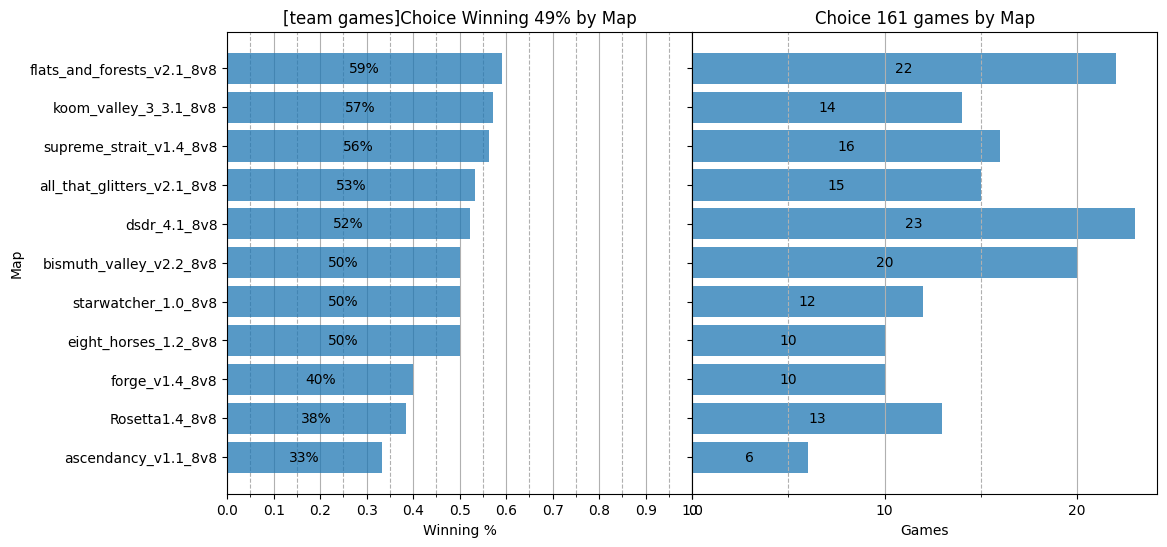

In [24]:
plot_win_rate("Choice")
plt.show()

# Top 30

Min 6 games played per map to be included.

/tmp/ipykernel_40109/3791118153.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, (ax1, ax2) = plt.subplots(1, 2, sharey="all", figsize=(12, 6))


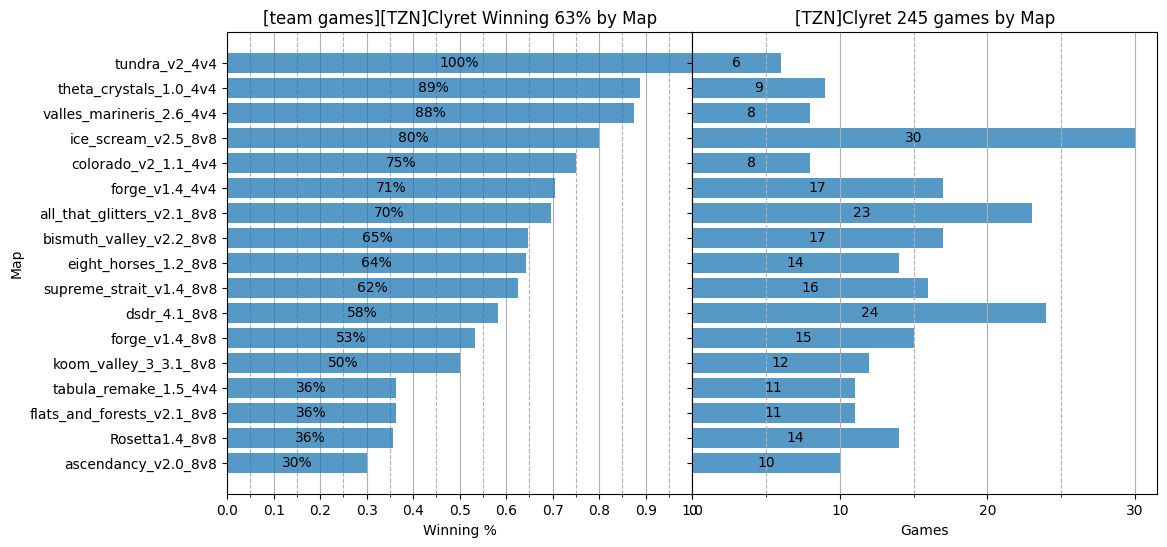

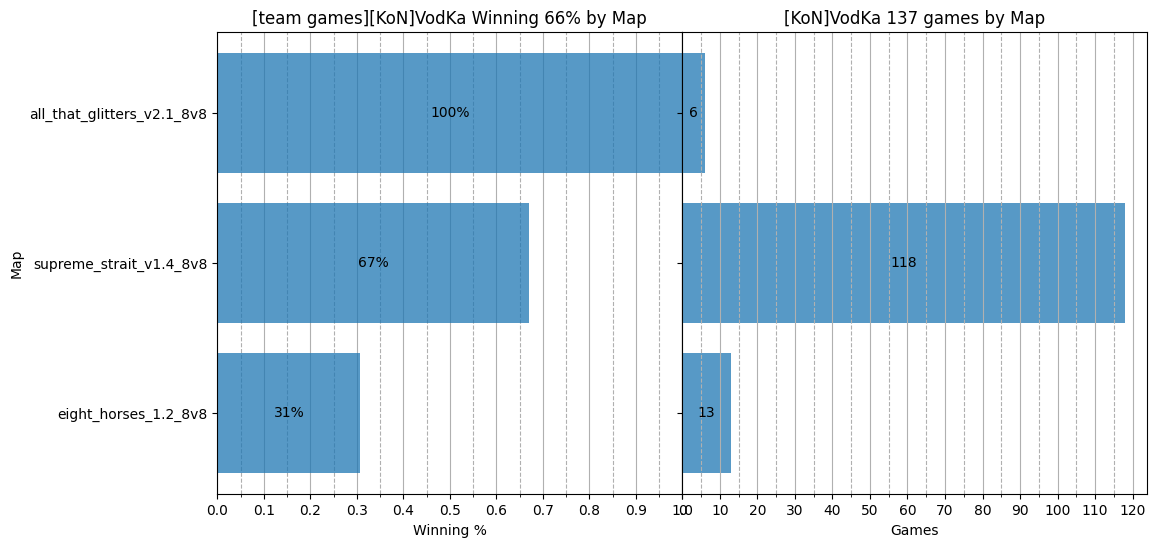

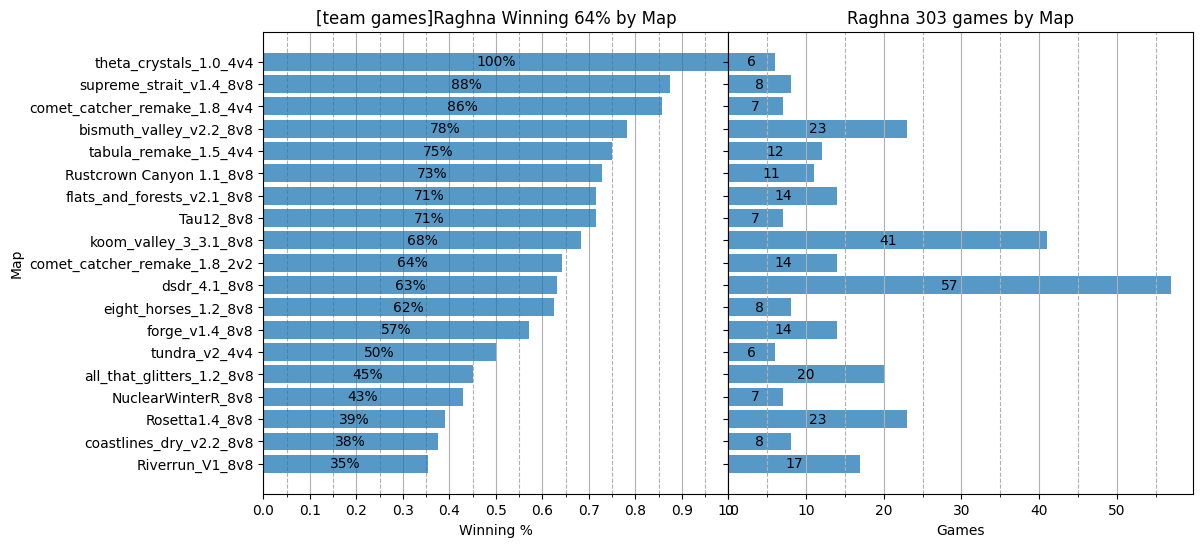

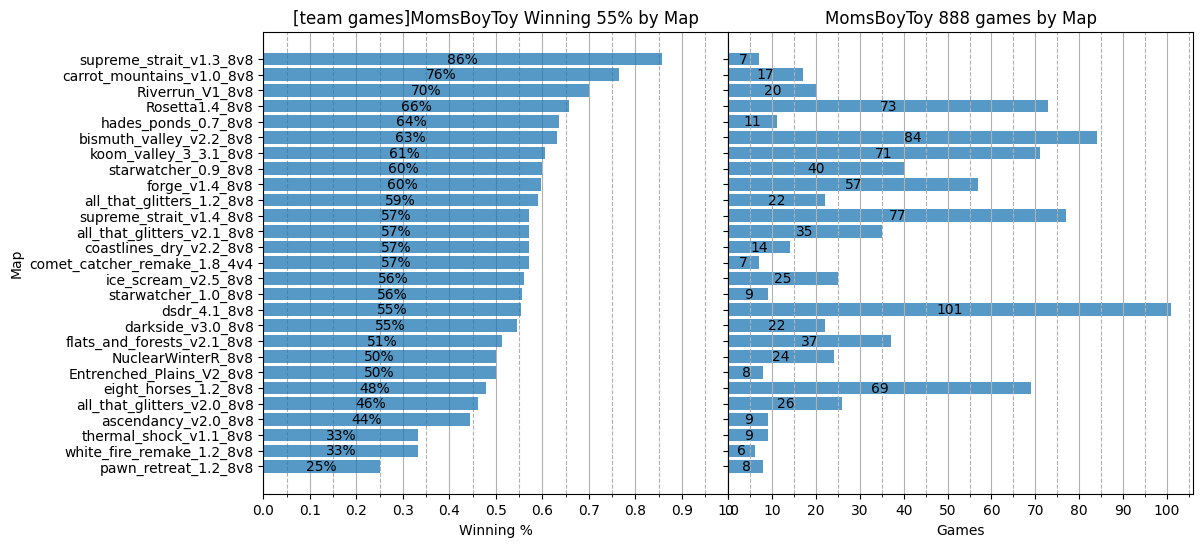

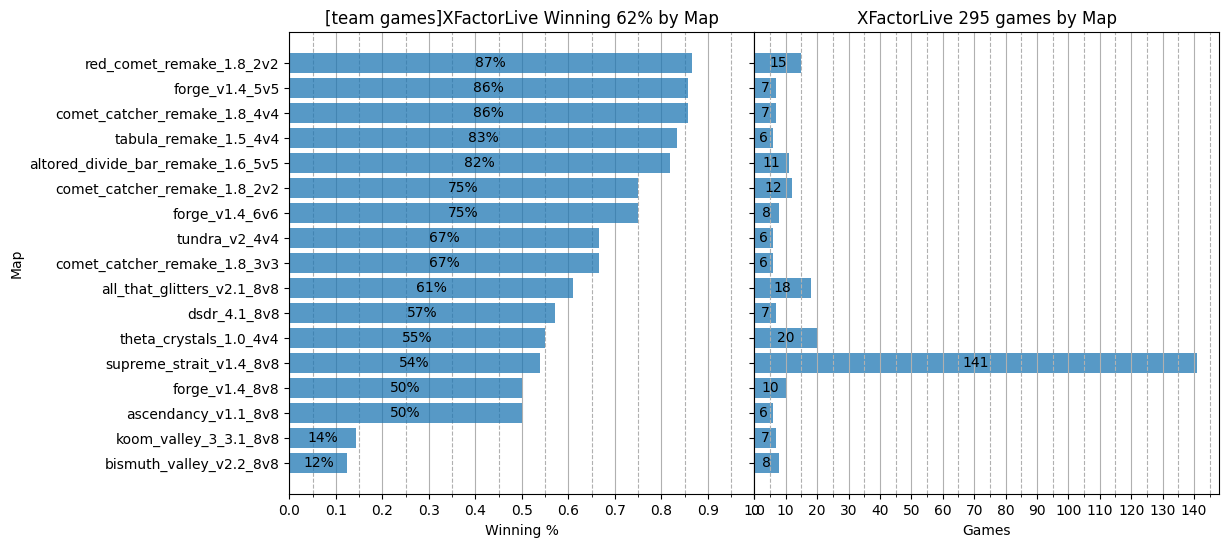

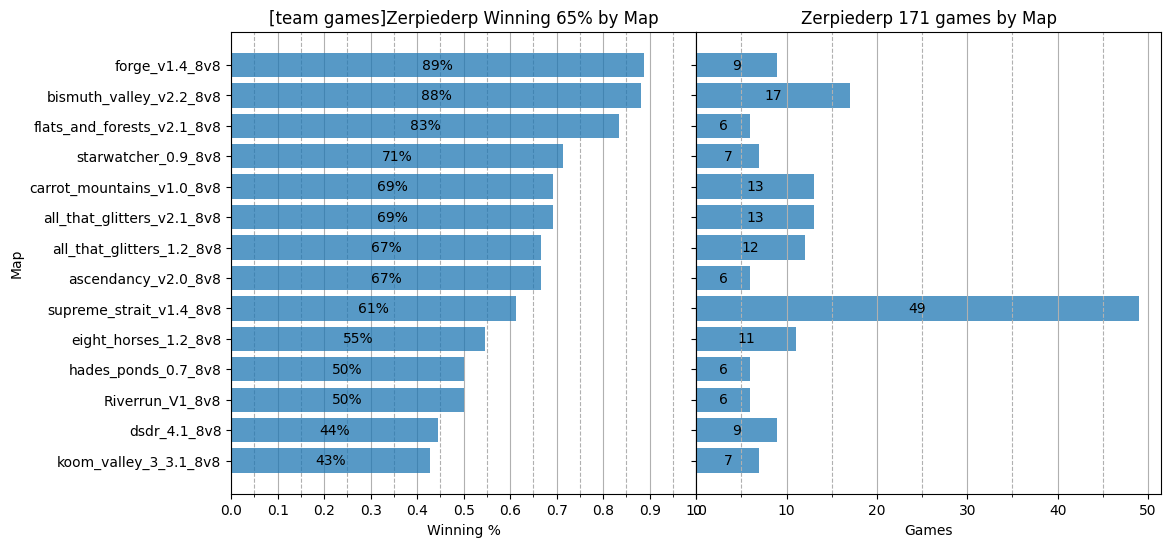

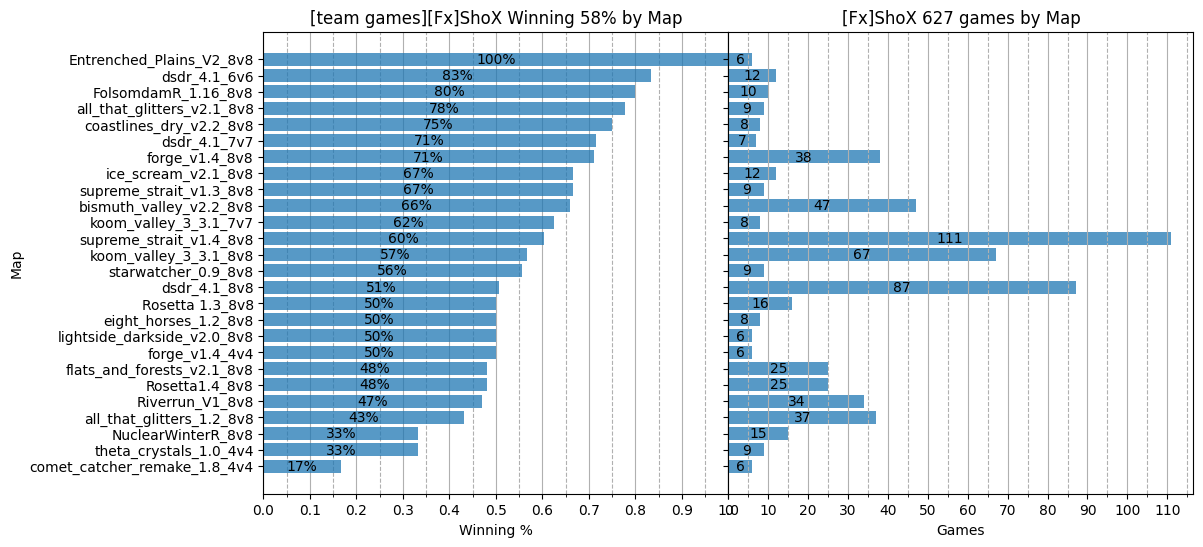

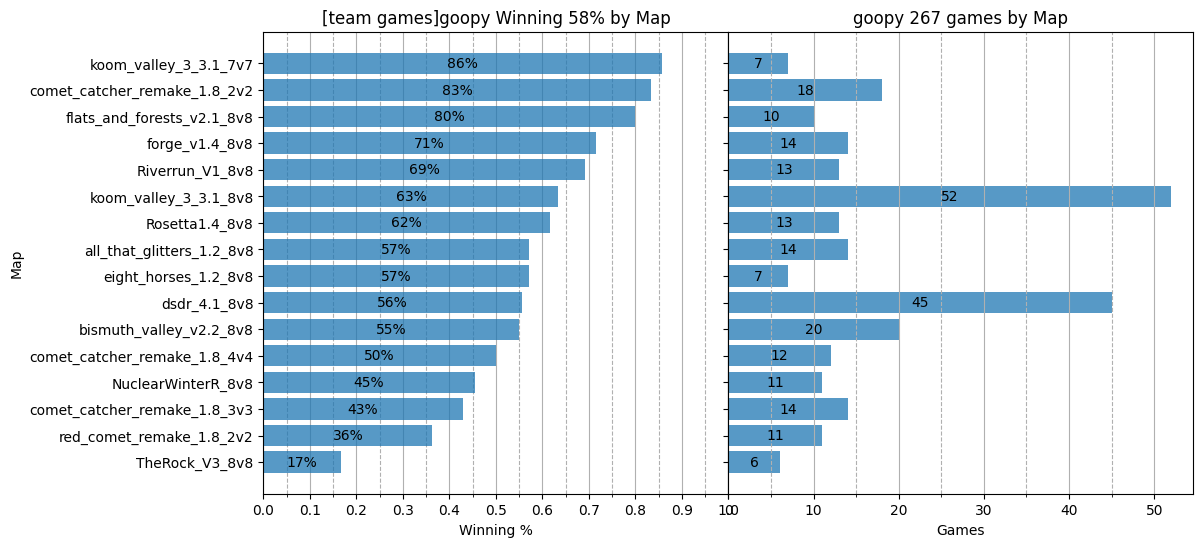

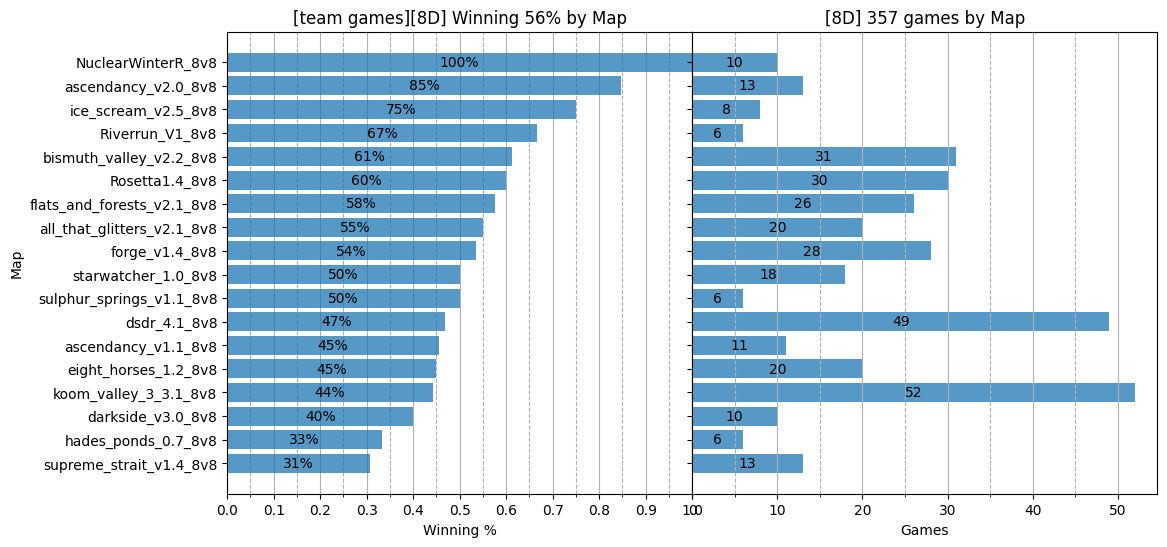

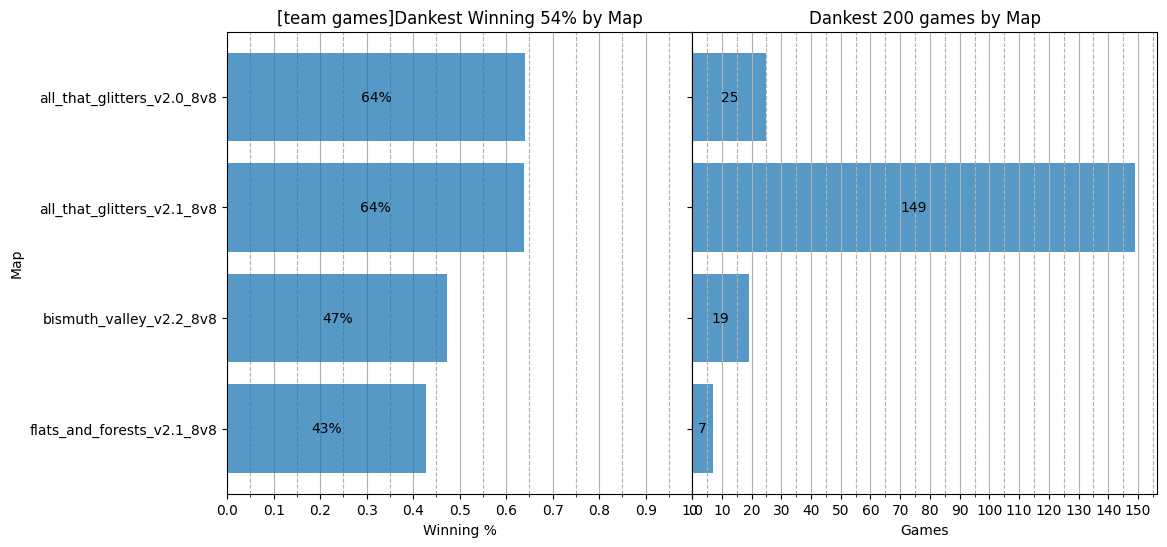

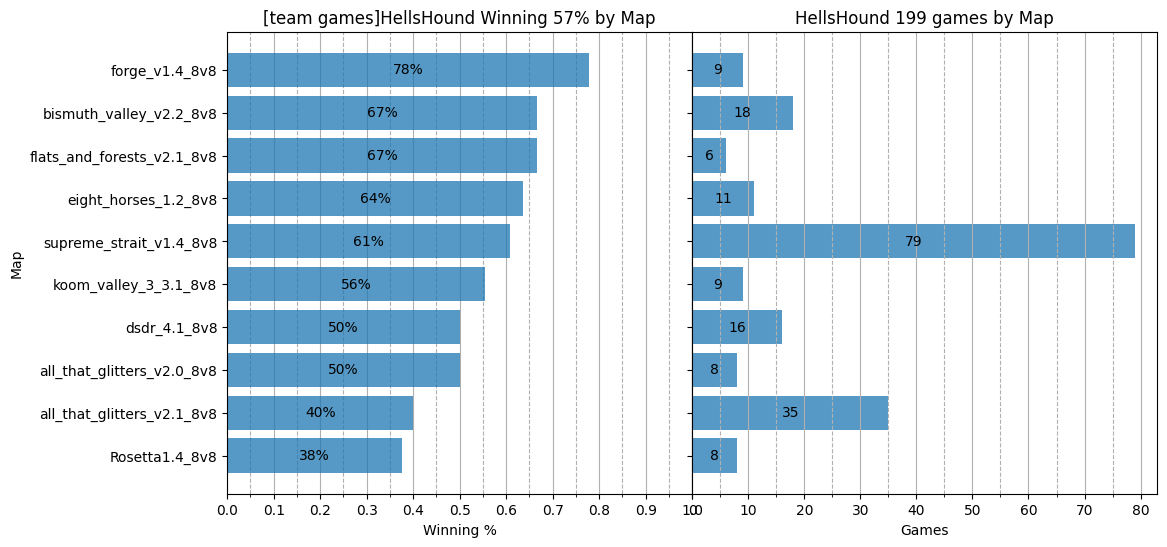

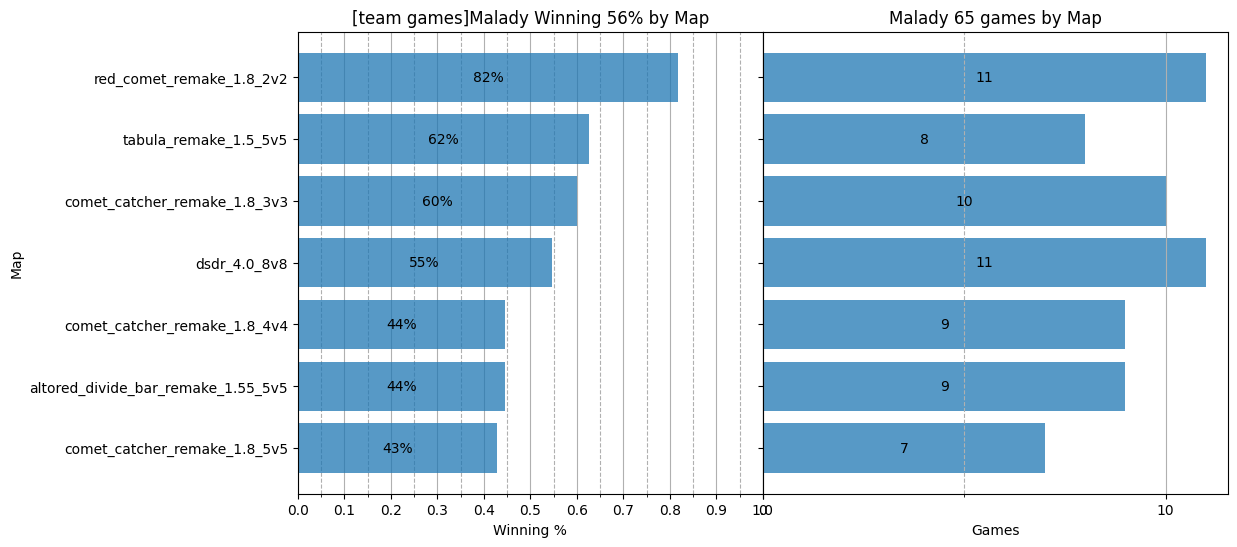

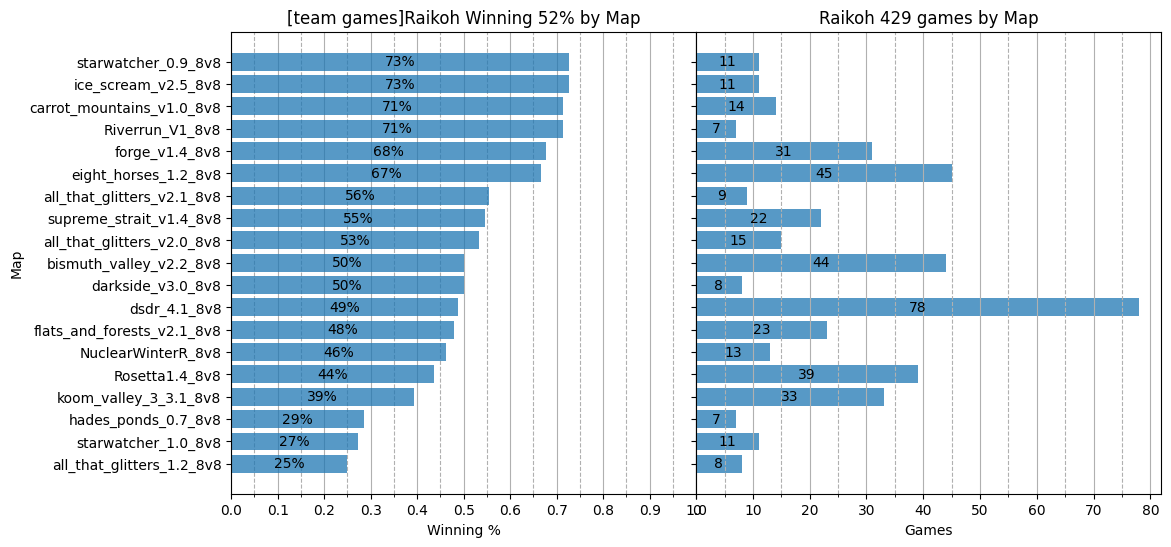

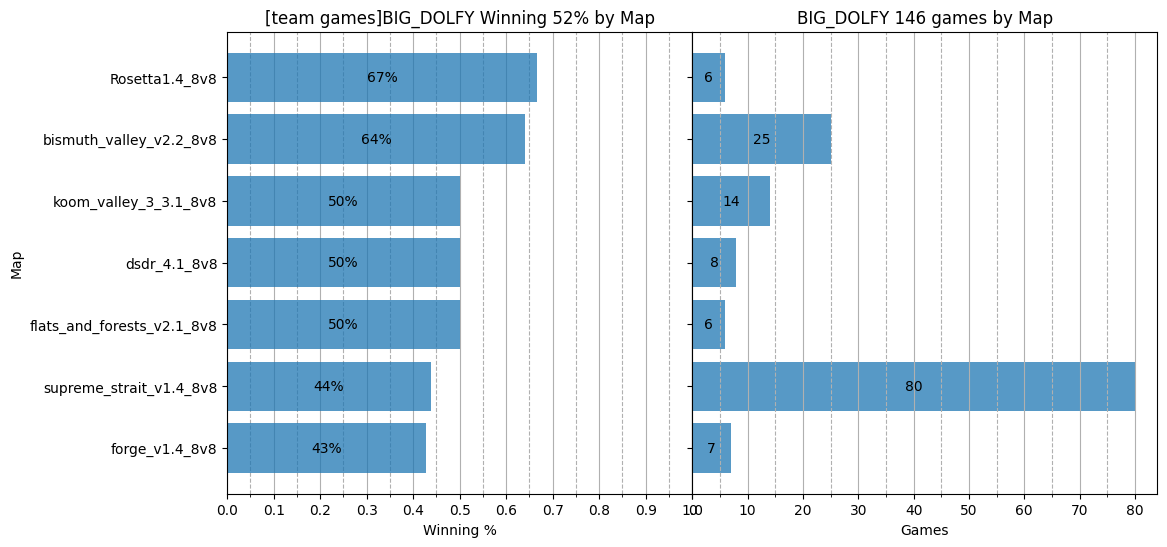

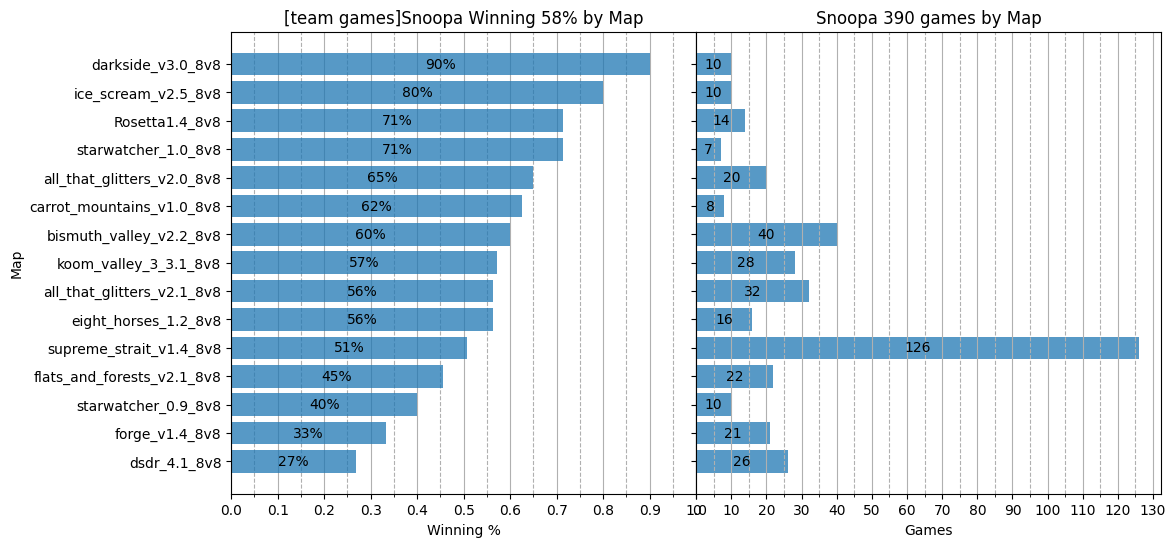

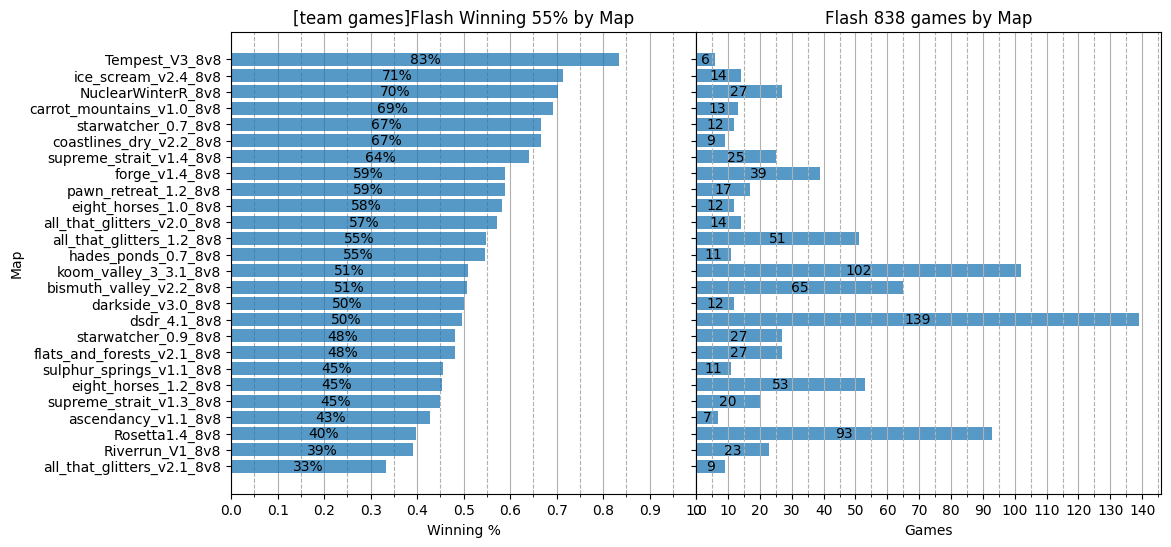

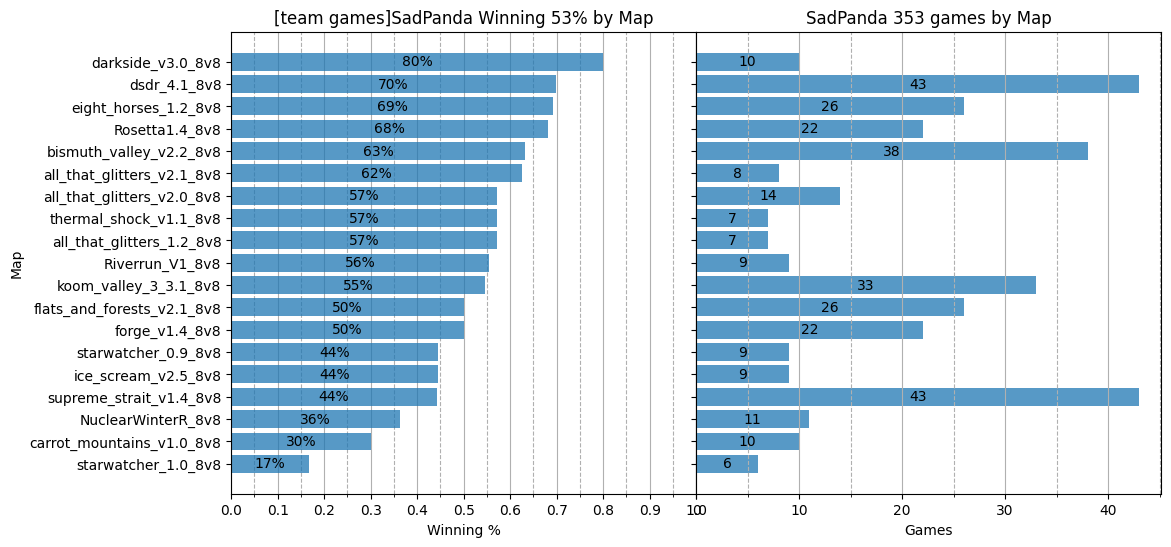

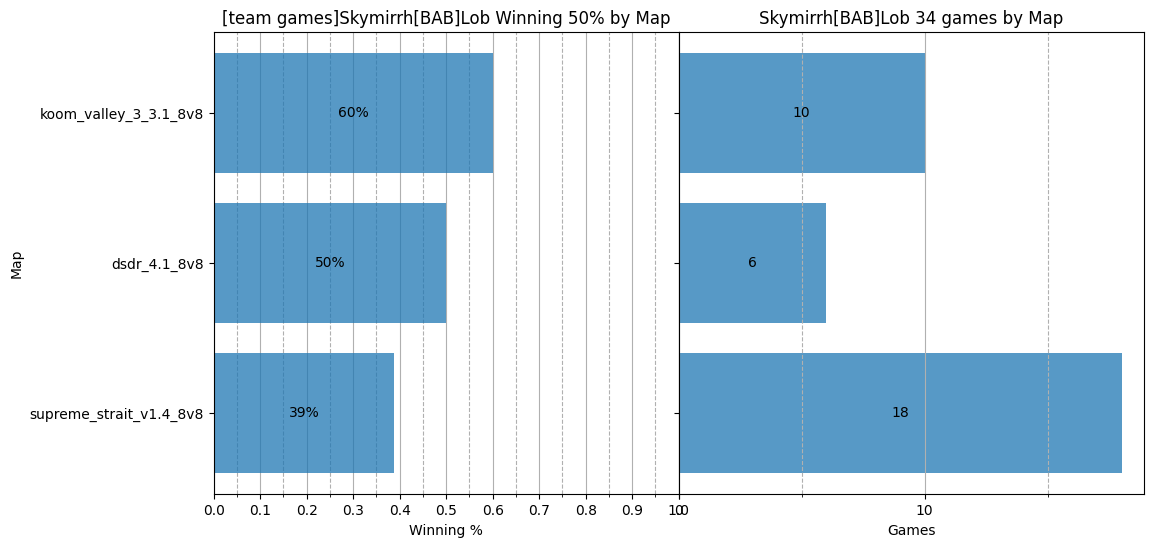

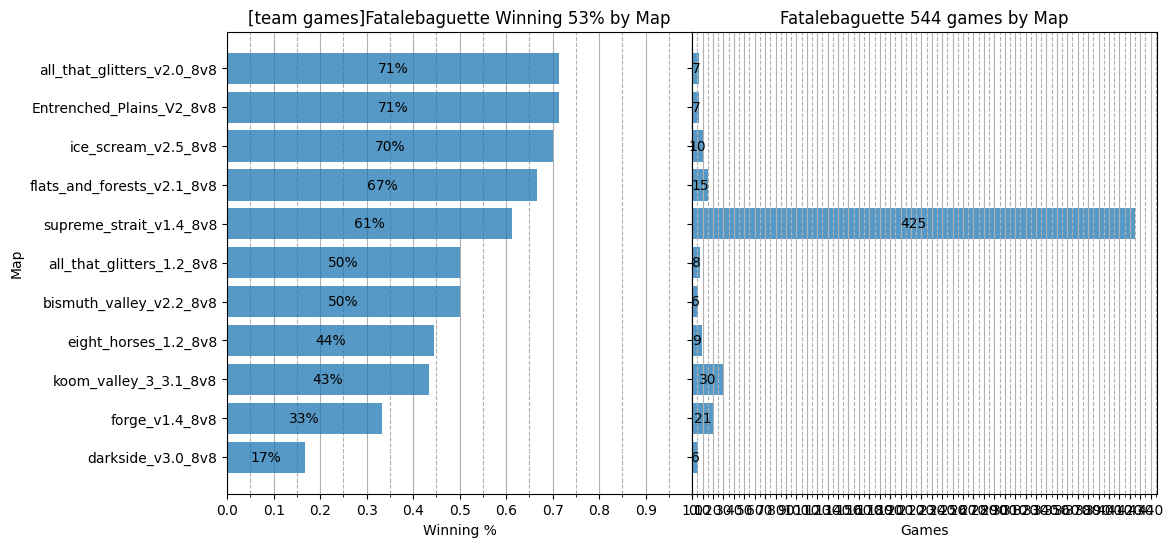

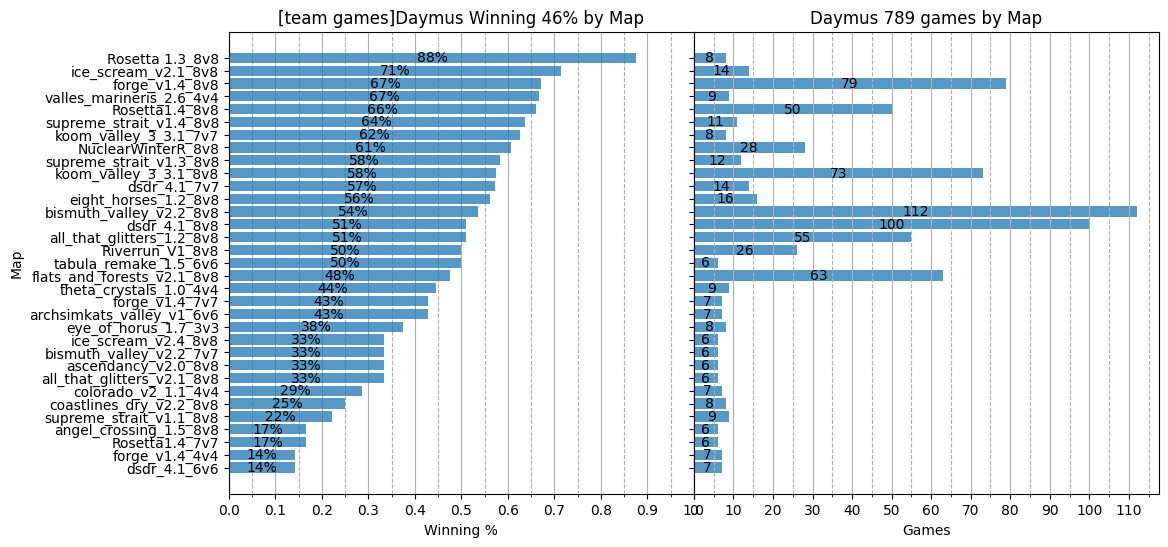

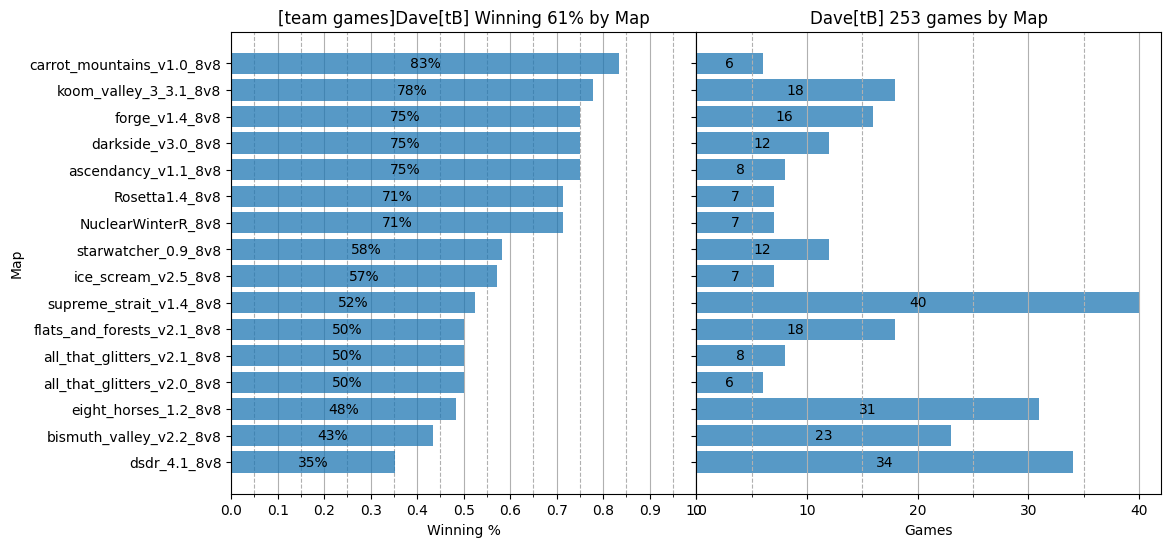

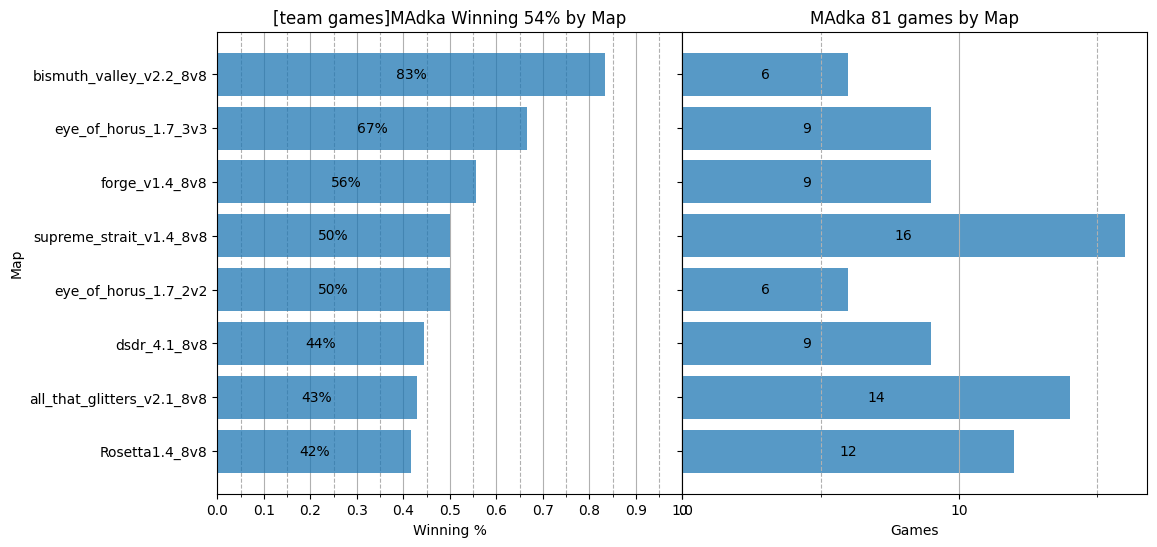

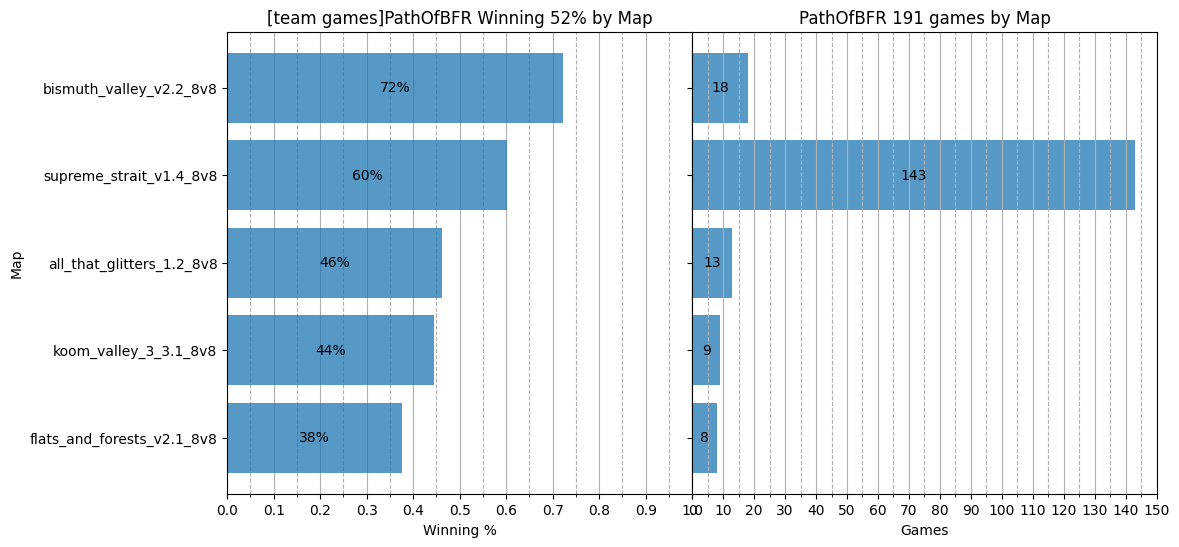

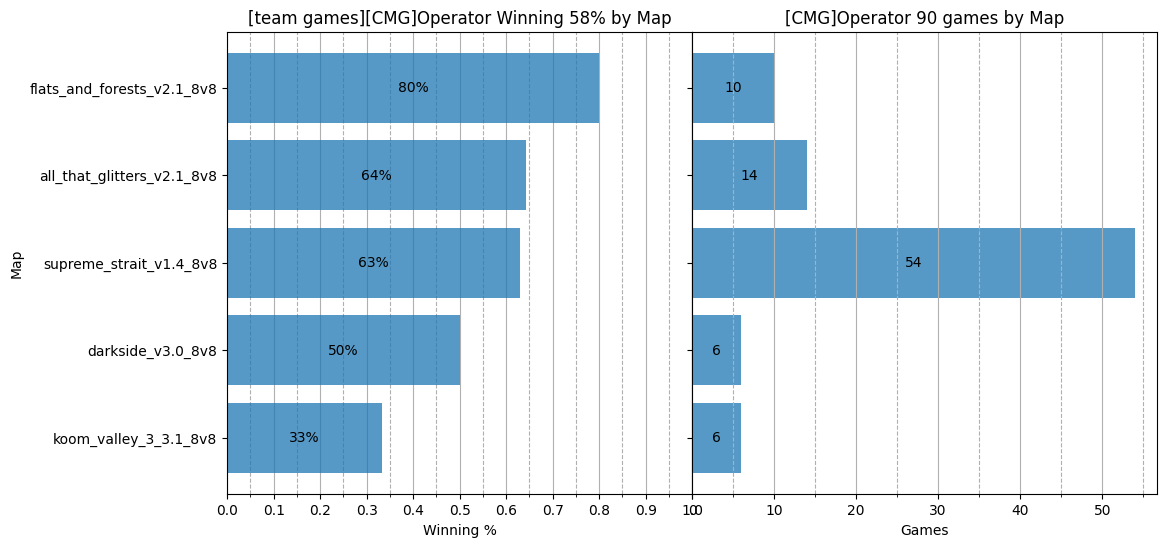

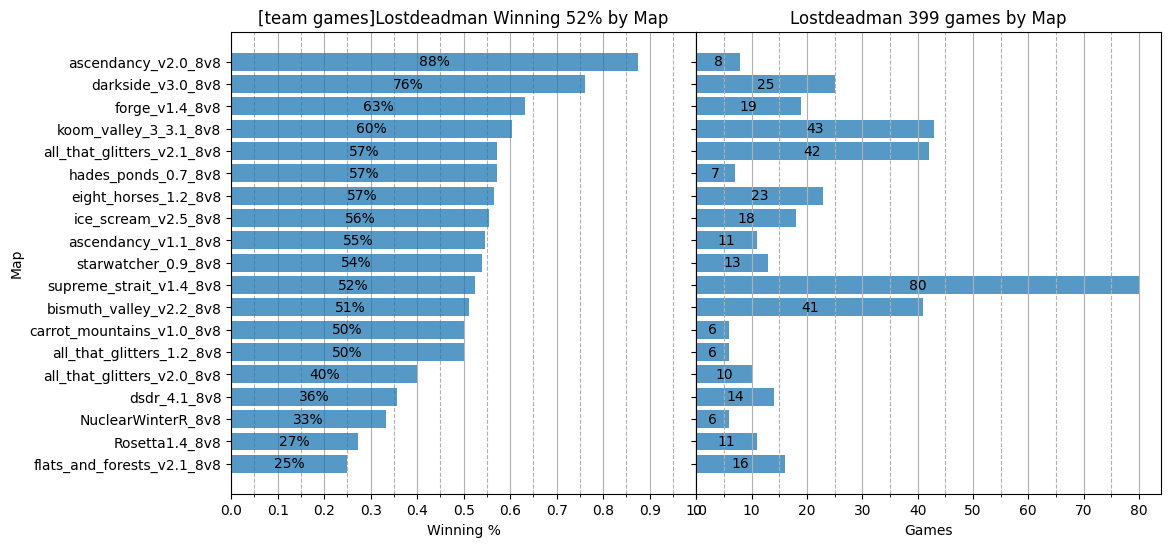

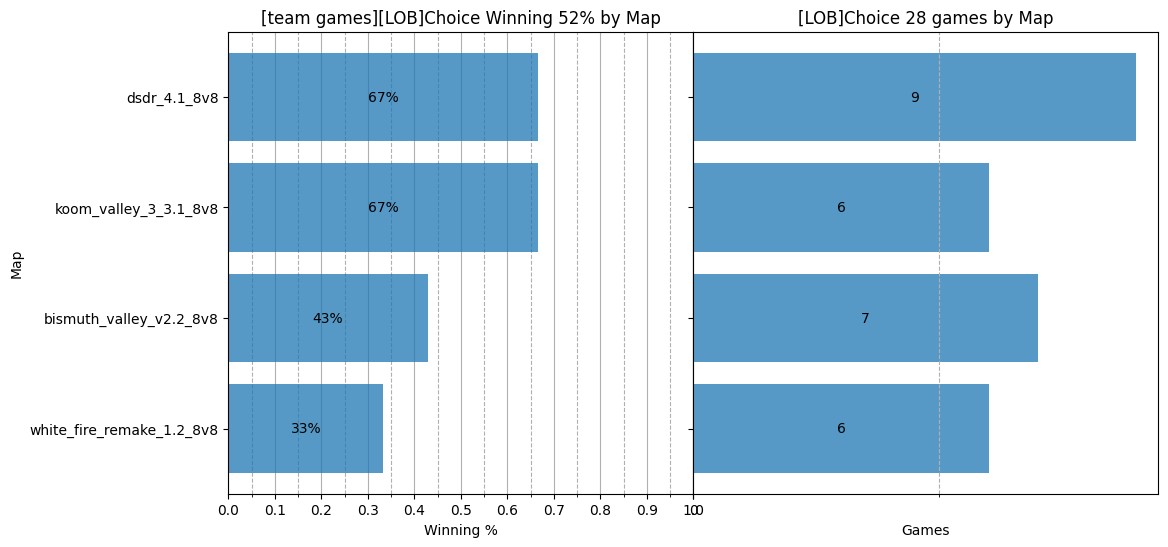

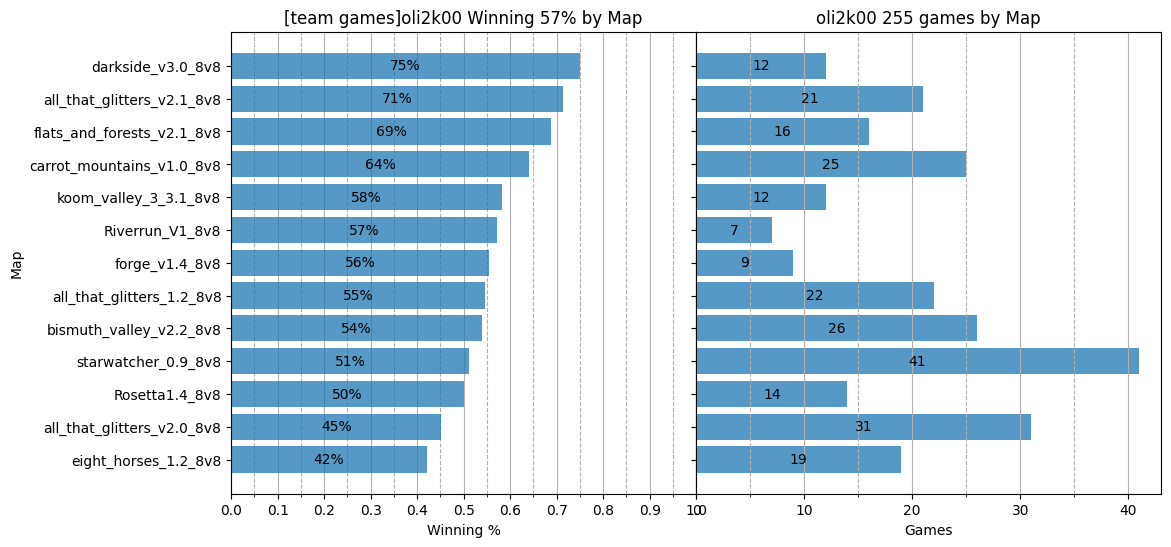

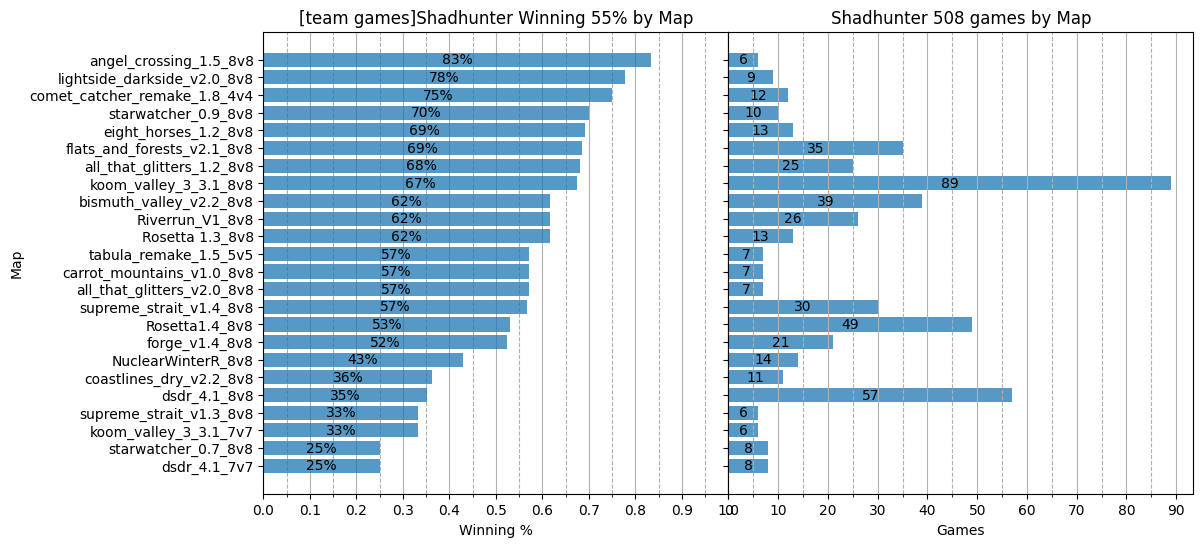

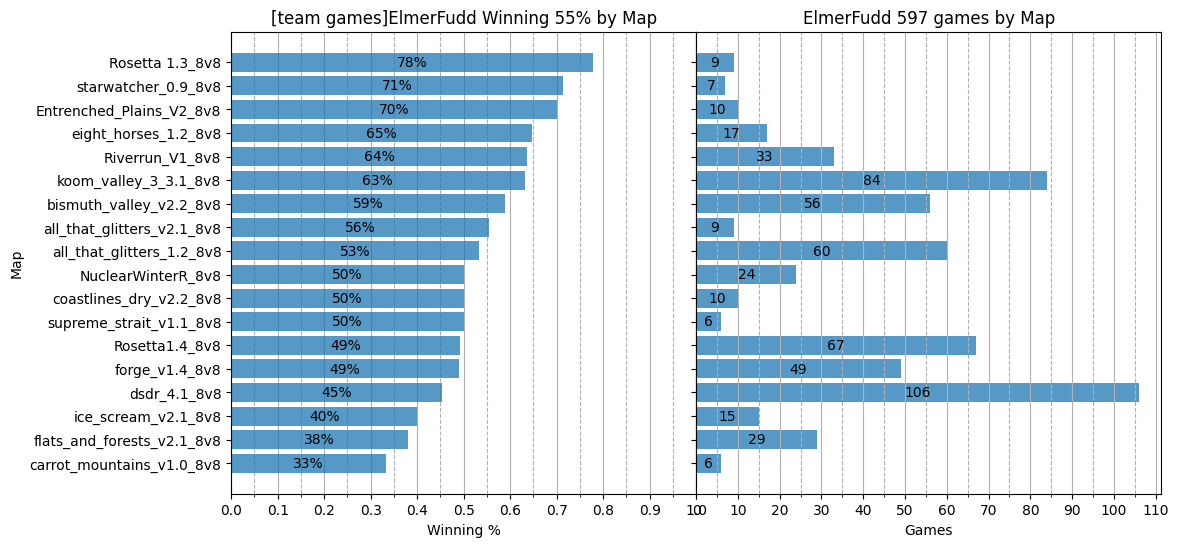

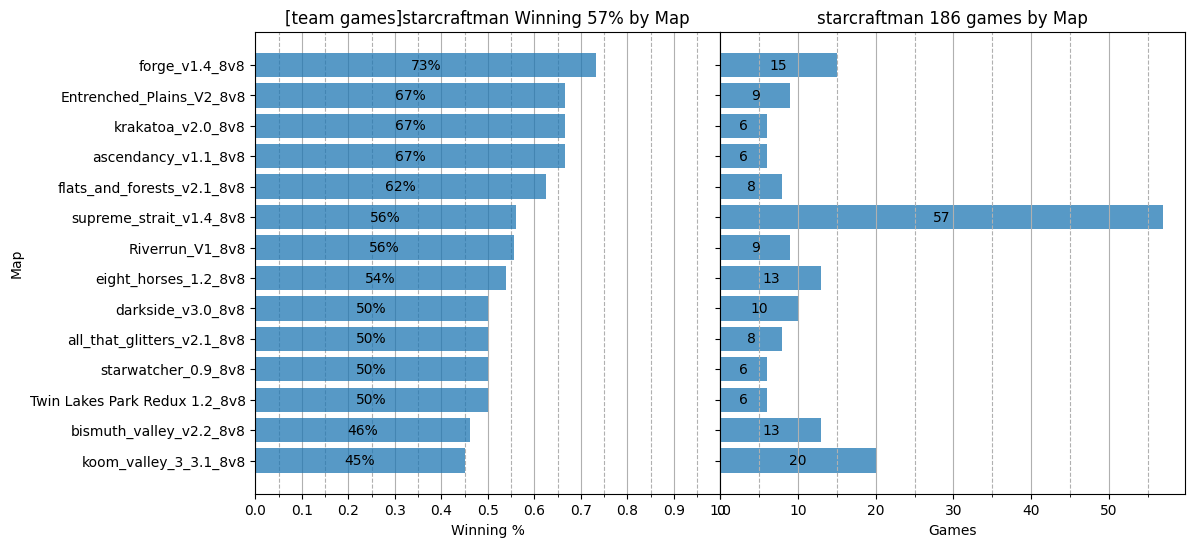

In [10]:
for user in team_leaderboards_df["name"]:
    matches_df = get_match_data(user, PRESET)
    # matches_df.to_csv(f"../data/{user}.csv")
    plot_win_rate(user)
plt.show()

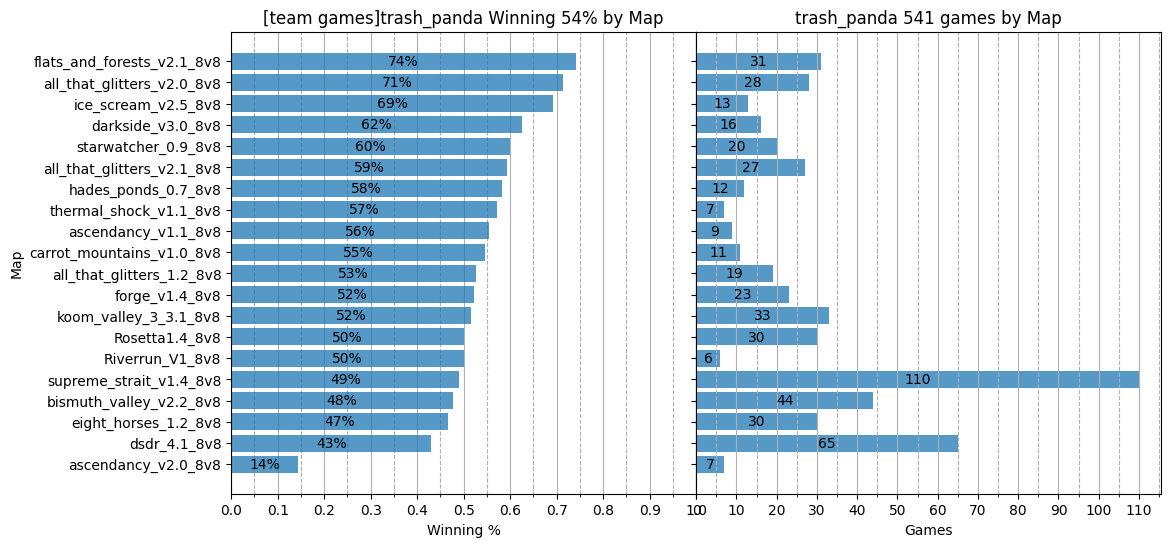

In [11]:
plot_win_rate("trash_panda")

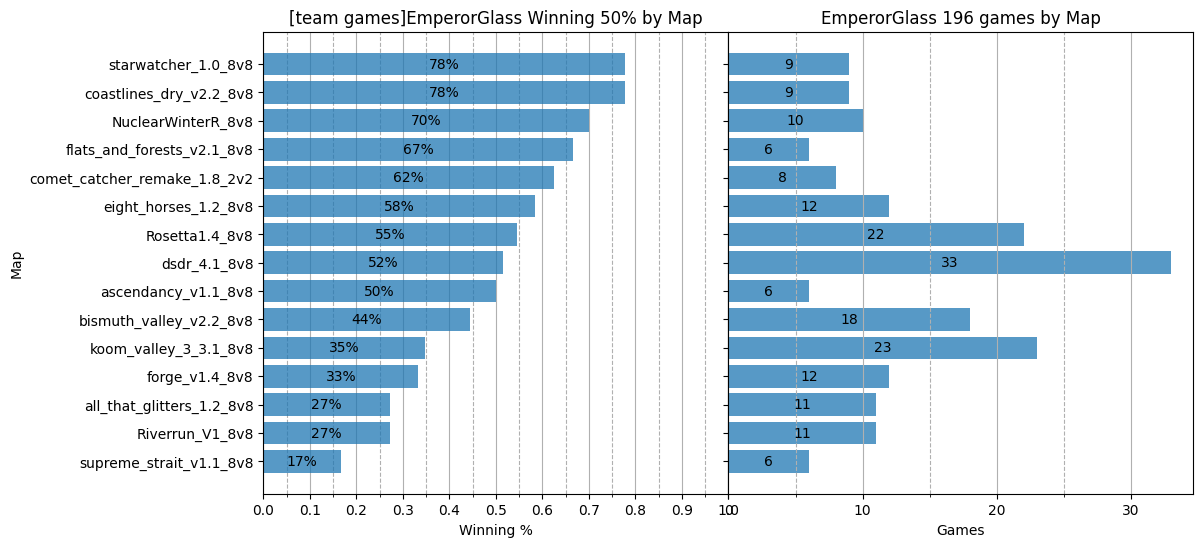

In [12]:
plot_win_rate("EmperorGlass")

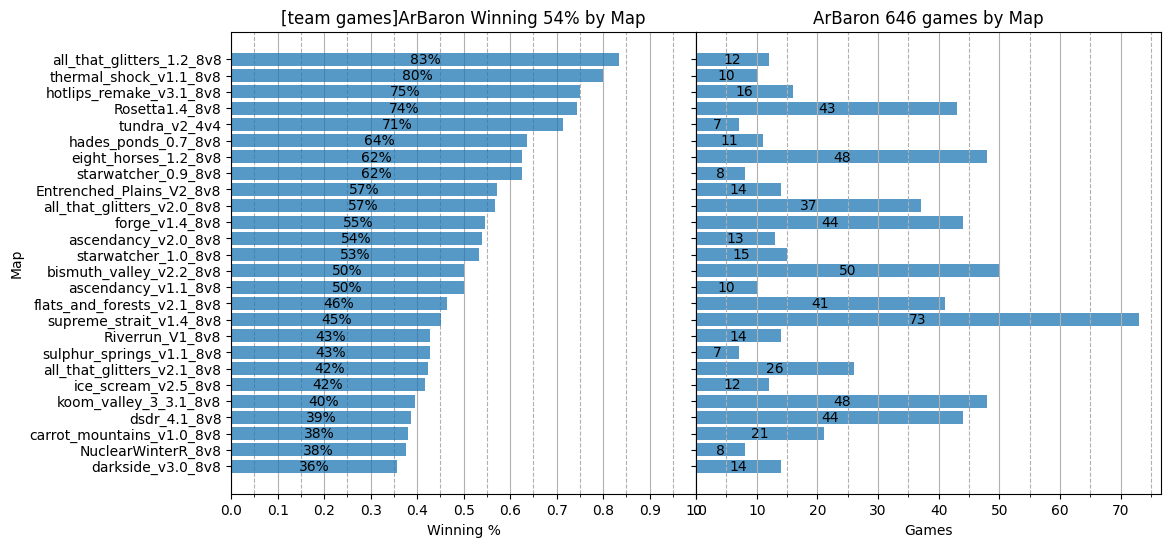

In [13]:
plot_win_rate("ArBaron")

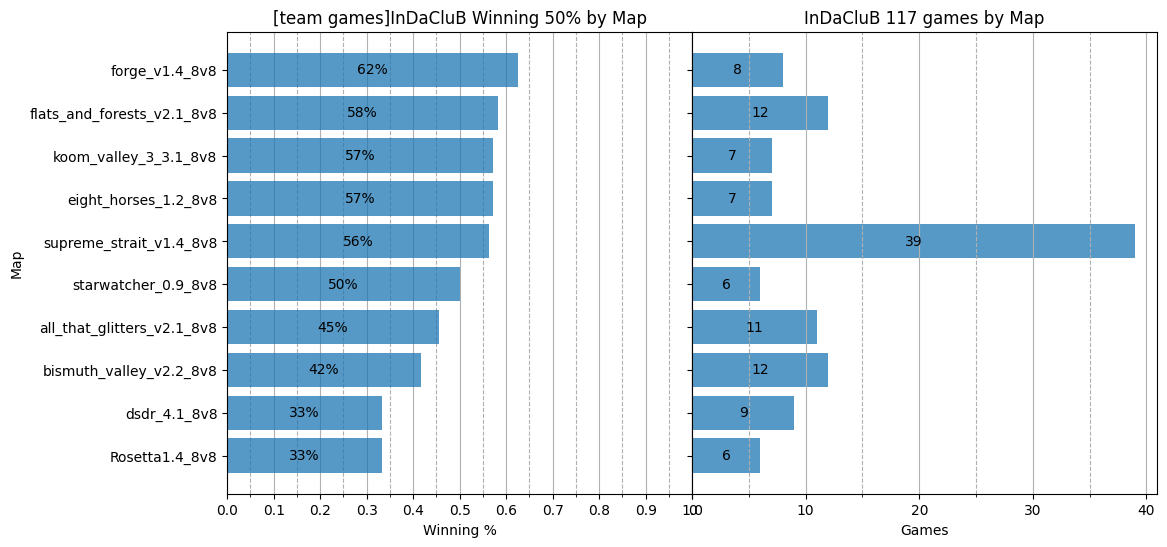

In [14]:
plot_win_rate("InDaCluB")

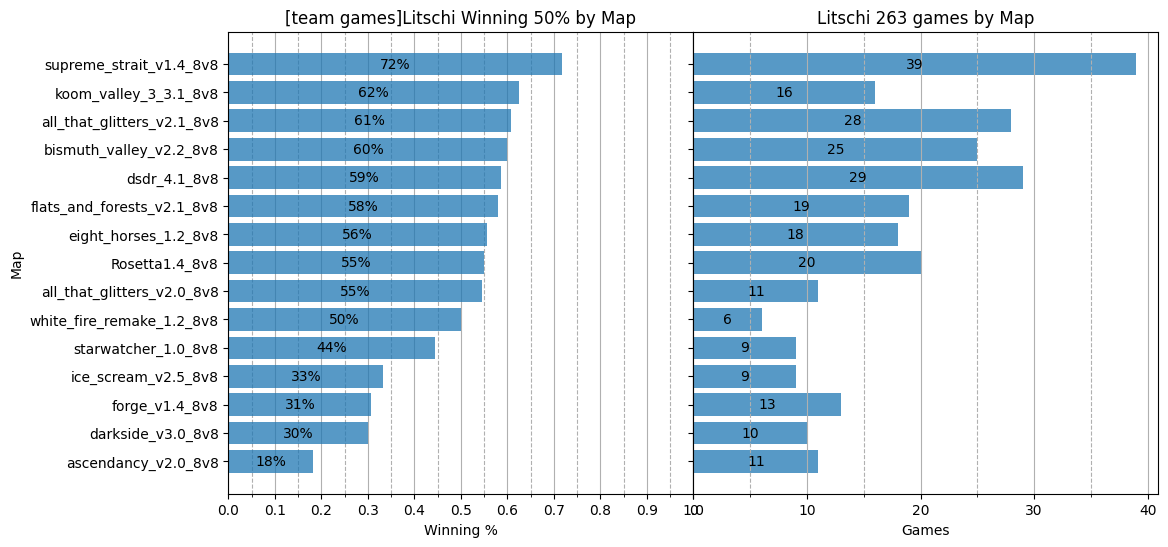

In [15]:
plot_win_rate("Litschi")

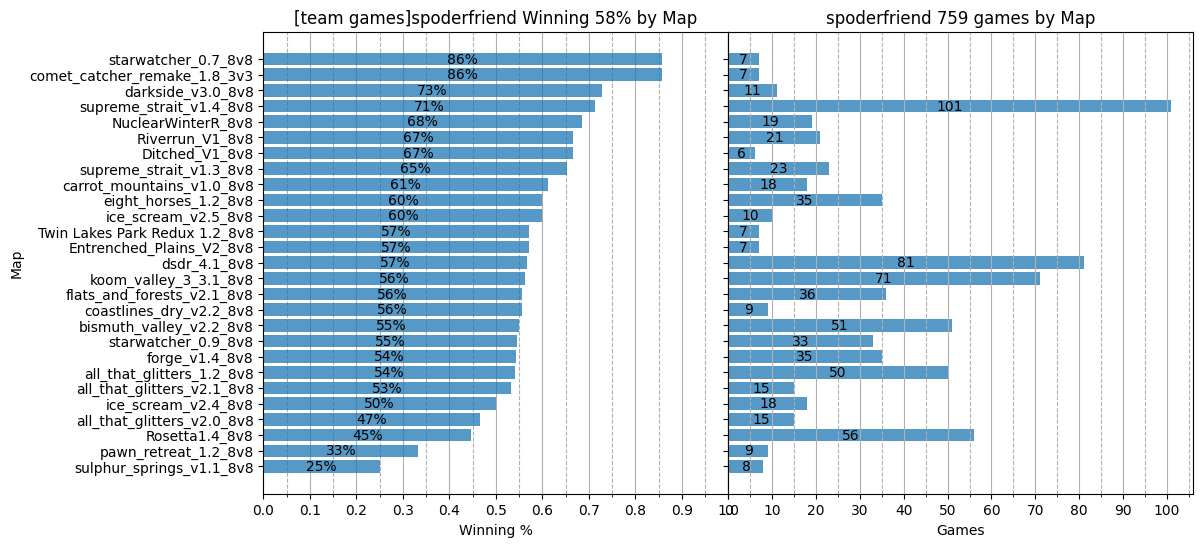

In [16]:
plot_win_rate("spoderfriend")

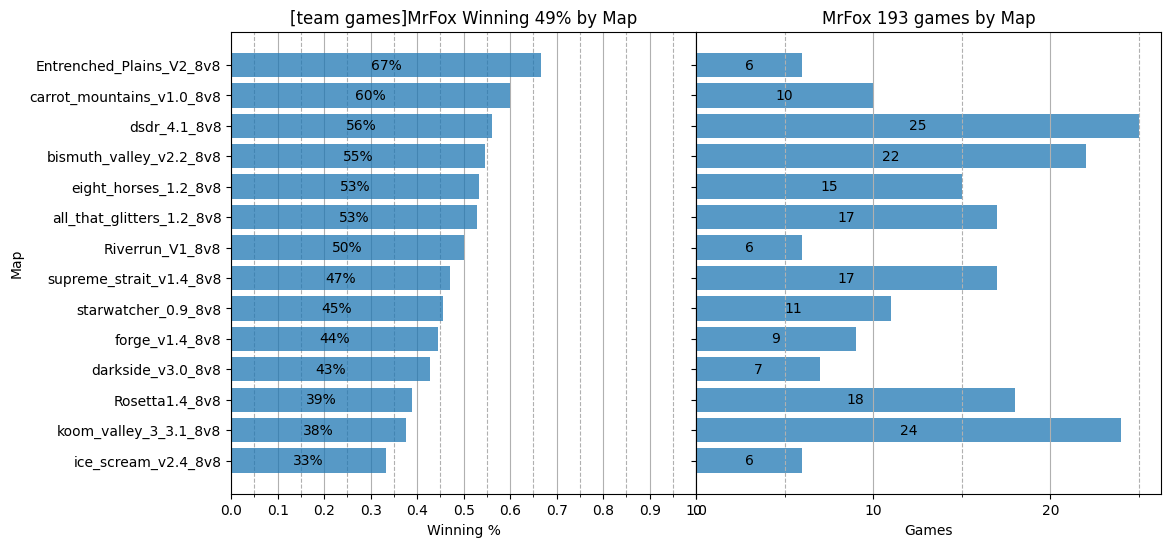

In [17]:
plot_win_rate("MrFox")

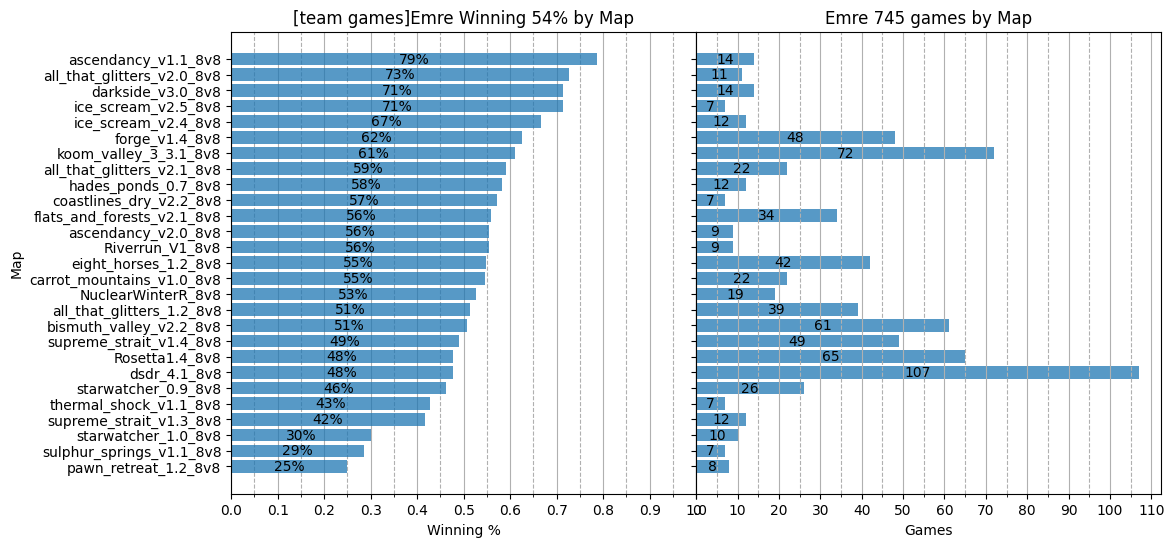

In [18]:
plot_win_rate("Emre")

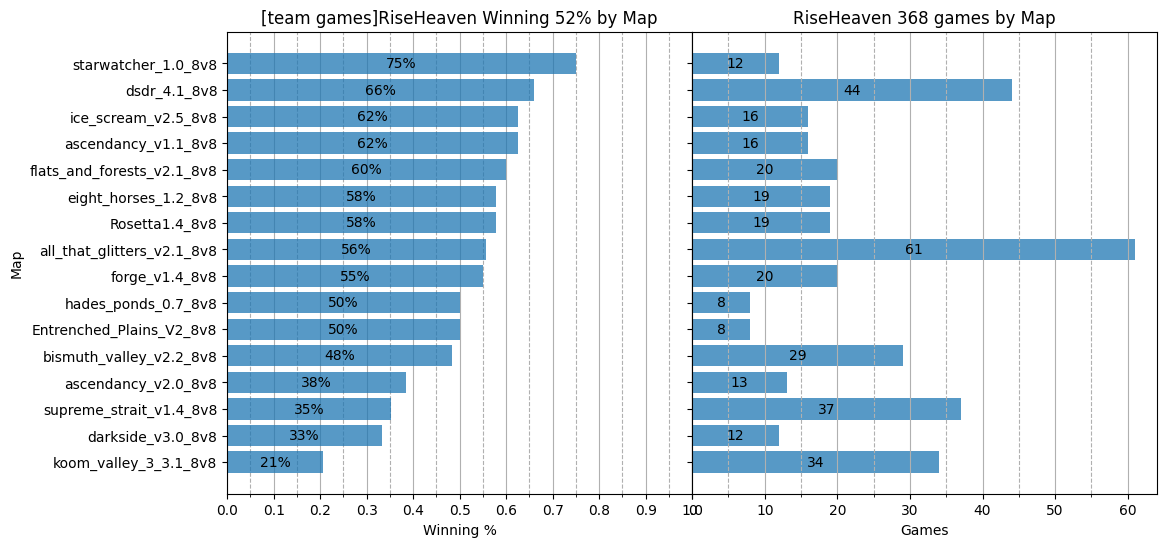

In [19]:
plot_win_rate("RiseHeaven")

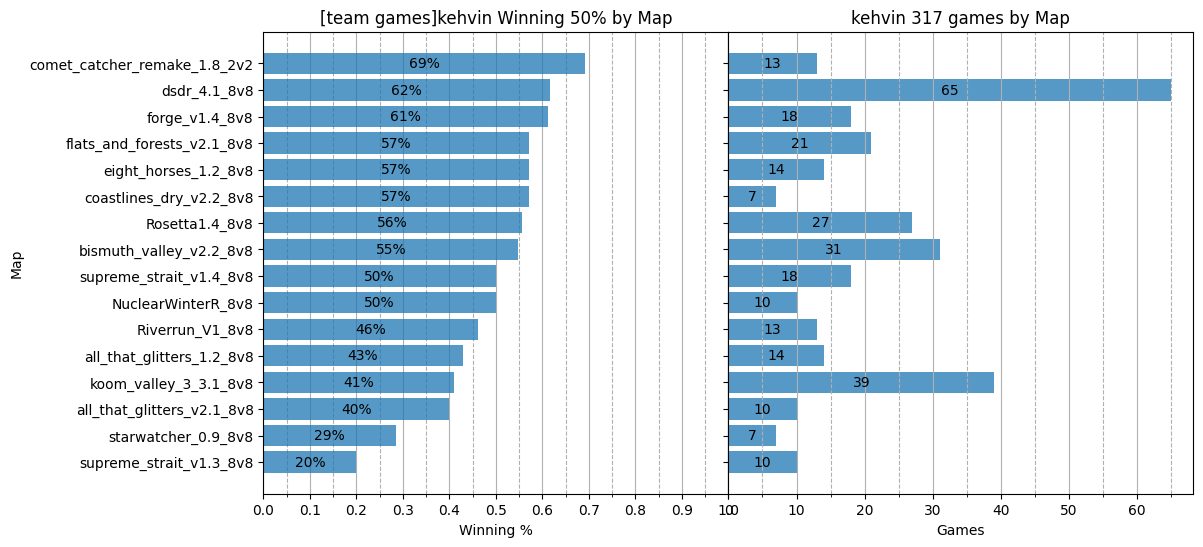

In [21]:
plot_win_rate("kehvin")

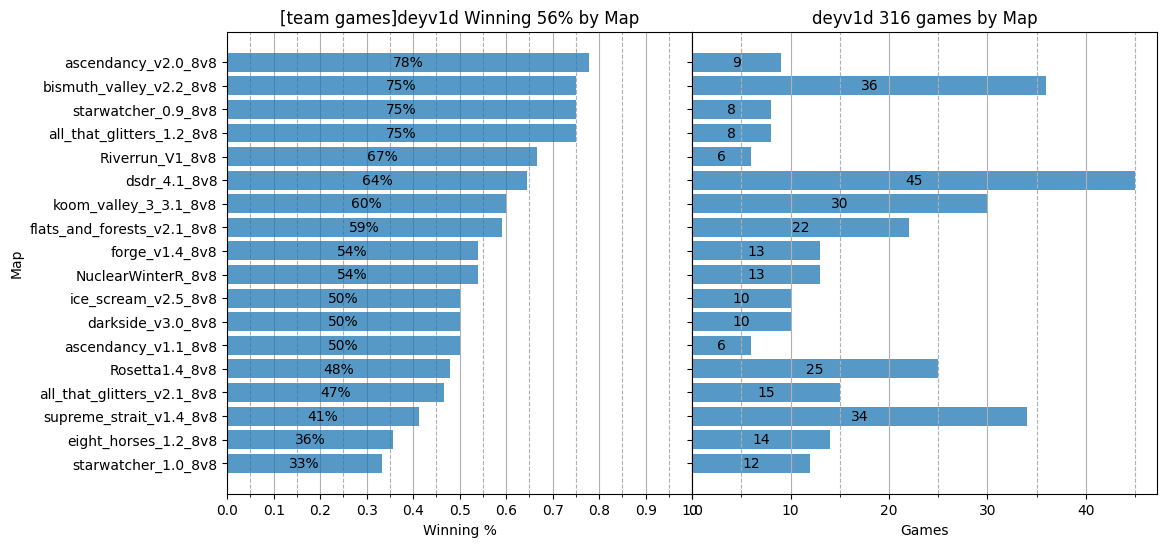

In [23]:
plot_win_rate("deyv1d")

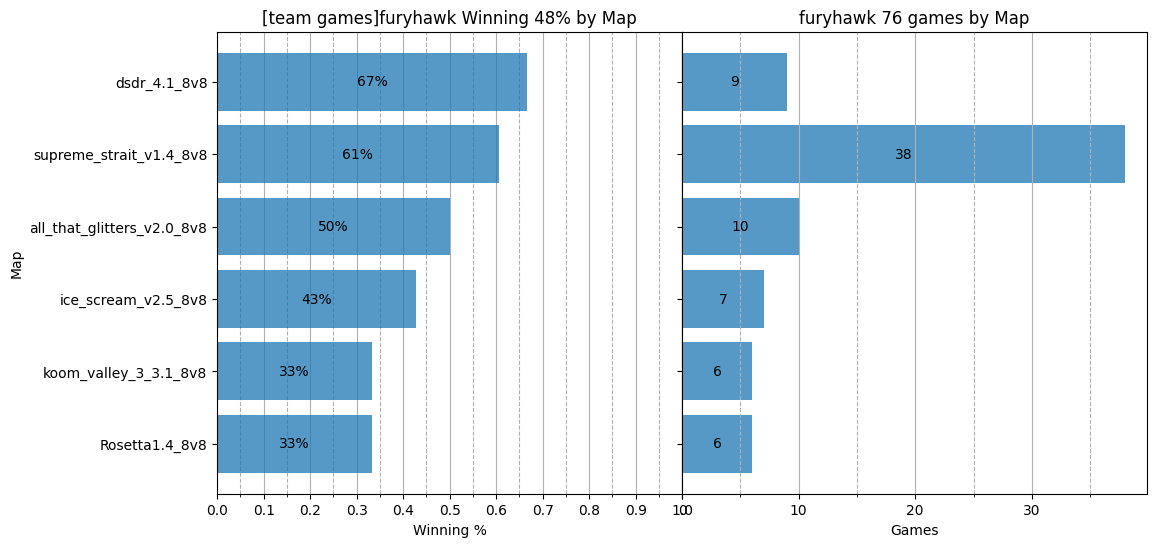

In [20]:
plot_win_rate("furyhawk")

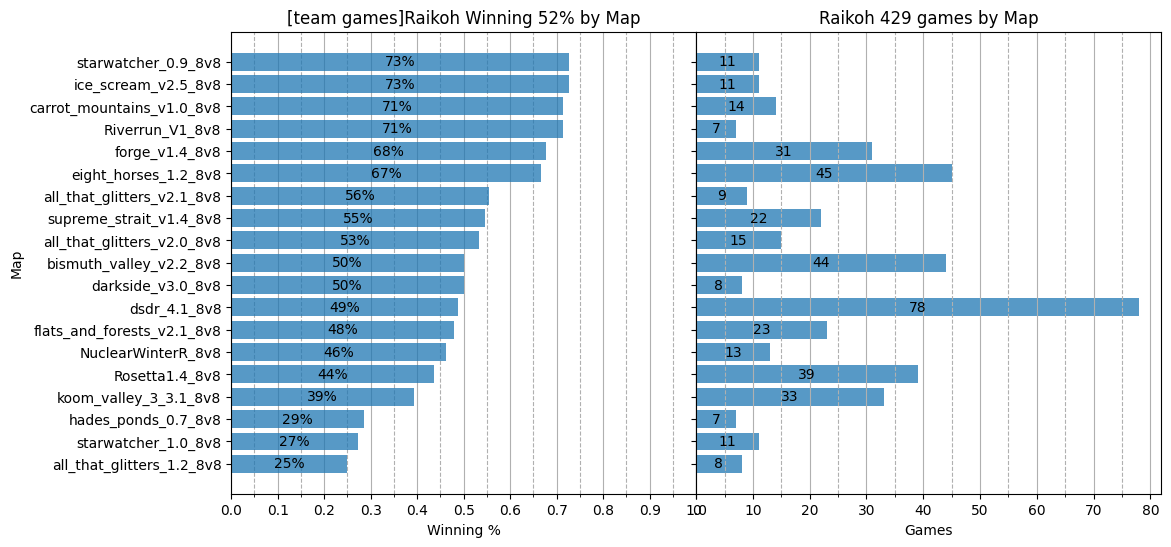

In [22]:
plot_win_rate("Raikoh")